# **Logistic Regression with Stats Models**

Logistic Regression is a statistical method used for binary classification tasks, where the outcome variable is categorical and has only two possible values. It's widely employed in various fields like healthcare (predicting disease occurrence), finance (credit scoring), and marketing (customer churn prediction).

### **Key Concepts:**

1. **Binary Classification**: Logistic Regression is suitable for predicting binary outcomes, such as yes/no, pass/fail, etc.

2. **Sigmoid Function**: Logistic Regression uses the logistic function (also called the sigmoid function) to model the probability that a given instance belongs to a particular class.


### **Implementation Steps:**

1. **Data Preparation**: Prepare your dataset, ensuring it's cleaned and formatted properly.

2. **Model Training**: Fit a logistic regression model to your training data using a library like StatsModels or scikit-learn.

3. **Model Evaluation**: Evaluate the performance of the model on a separate test dataset using appropriate metrics like accuracy, precision, recall, or F1-score.

4. **Prediction**: Use the trained model to make predictions on new data.



## **Evaluation Metrics**
Evaluation metrics for classification models are essential for assessing the performance and effectiveness of the model in predicting categorical outcomes.

1. **Accuracy**: Accuracy measures the proportion of correctly predicted instances out of the total instances. It's calculated as the ratio of the number of correct predictions to the total number of predictions.

  Accuracy = (Number of Correct Prediction)/Total number of Predictions

2. **Precision**: Precision measures the proportion of true positive predictions out of all positive predictions. It indicates the model's ability to avoid false positives.

  Precision = TP / (TP + FP)
   

3. **Recall (Sensitivity)**: Recall measures the proportion of true positive predictions out of all actual positive instances. It indicates the model's ability to identify all positive instances.

  Recall = TP/ (TP + FN)

4. **F1-Score**: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall.

  F1-Score = 2 * (Precision * Recall)/(Precision + Recall)

5. **Confusion Matrix**: A confusion matrix is a table that summarizes the model's performance by comparing actual and predicted classes. It consists of four components: true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN).

   ```
                            Predicted
                     |  Positive  |  Negative  |
   Actual  Positive  |    TP      |    FN      |
          Negative   |    FP      |    TN      |
   ```



#### **Data:  Titanic Dataset**
**url :** https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

1. **PassengerId**: This feature represents a unique identifier for each passenger in the dataset. It is of type integer (int64). Each passenger is assigned a unique PassengerId, which serves as a reference for that particular passenger's data within the dataset.

2. **Survived**: This feature indicates whether a passenger survived the Titanic disaster or not. It is a binary variable, where:
   - 0 represents "Not Survived" (the passenger did not survive)
   - 1 represents "Survived" (the passenger survived)

3. **Pclass**: Pclass refers to the passenger's ticket class, which is an indicator of their socio-economic status. It is also known as the passenger's socioeconomic class. Pclass is represented as an integer (int64) variable with three possible values:
   - 1: First Class
   - 2: Second Class
   - 3: Third Class

4. **Name**: This feature contains the name of each passenger. It is of type object (string). The name feature provides the passenger's full name, including their title (e.g., Mr., Mrs., Miss, etc.), which can provide insights into their social status.

5. **Sex**: Sex indicates the gender of the passenger. It is a categorical variable represented as an object (string) with two possible values:
   - "male"
   - "female"

6. **Age**: Age represents the age of the passenger in years. It is a continuous numerical variable of type float64. Note that there are some missing values in this feature, as indicated by "non-null" count being less than the total count of rows (891).

7. **SibSp**: SibSp denotes the number of siblings or spouses (brother, sister, stepbrother, stepsister, husband, or wife) aboard the Titanic for each passenger. It is an integer (int64) variable indicating the count.

8. **Parch**: Parch represents the number of parents or children (mother, father, daughter, son, stepdaughter, stepson) aboard the Titanic for each passenger. Similar to SibSp, it is also an integer (int64) variable indicating the count.

9. **Ticket**: Ticket refers to the ticket number of each passenger. It is of type object (string). The ticket number uniquely identifies each passenger's ticket and may contain information about the ticket class, fare, and cabin location.

10. **Fare**: Fare represents the passenger's fare or ticket price. It is a numerical variable of type float64, indicating the amount paid by each passenger for their ticket.

11. **Cabin**: Cabin denotes the cabin number of each passenger, if available. It is of type object (string). The Cabin feature may provide insights into the passenger's accommodation on the Titanic, although it has many missing values (as indicated by "non-null" count being less than the total count of rows).

12. **Embarked**: Embarked indicates the port of embarkation for each passenger. It is a categorical variable represented as an object (string) with three possible values:
   - "C": Cherbourg
   - "Q": Queenstown
   - "S": Southampton



In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')



In [ ]:
# Load the Titanic dataset
titanic_data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")




In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Select relevant features and target variable
X = titanic_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic_data['Survived']


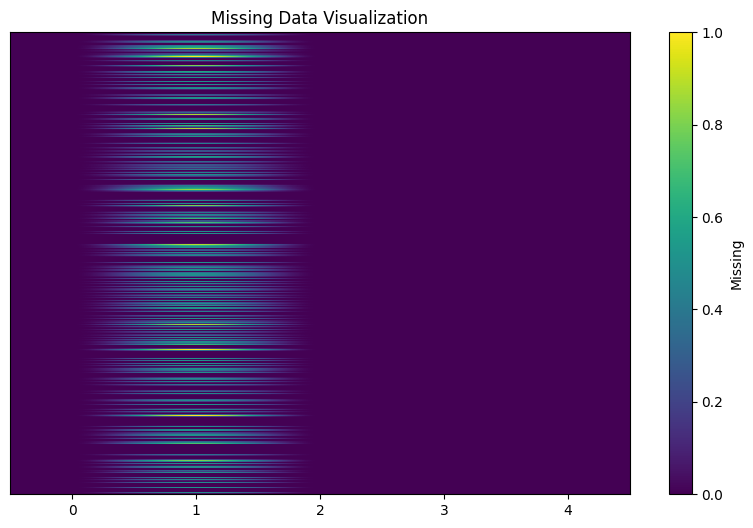

In [ ]:
# Create a heatmap to visualize missing data
plt.figure(figsize=(10, 6))
plt.imshow(X.isnull(), cmap='viridis', aspect='auto')
plt.title('Missing Data Visualization')
plt.yticks([])
plt.colorbar(label='Missing')
plt.show()


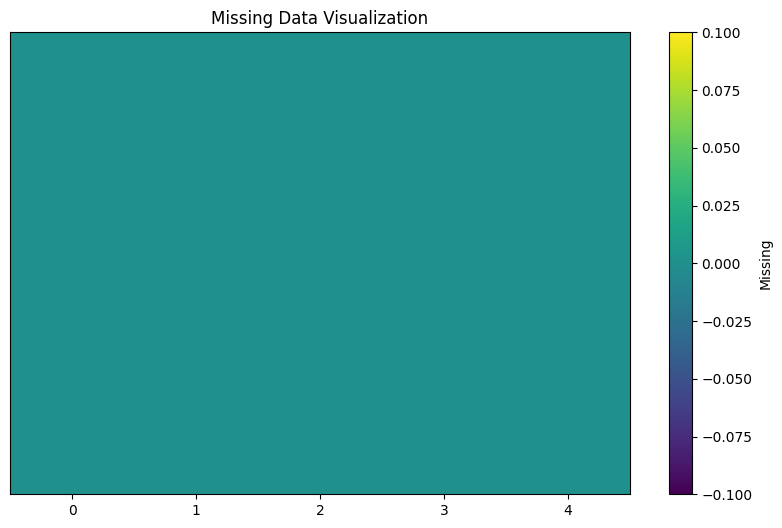

In [ ]:
# Handle missing values
X['Age'].fillna(X['Age'].mean(), inplace=True)

# Create a heatmap to visualize missing data
plt.figure(figsize=(10, 6))
plt.imshow(X.isnull(), cmap='viridis', aspect='auto')
plt.title('Missing Data Visualization')
plt.yticks([])
plt.colorbar(label='Missing')
plt.show()


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)






In [ ]:
# Fit the logistic regression model
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()





Optimization terminated successfully.
         Current function value: 0.586797
         Iterations 6


In [ ]:
# Make predictions and evaluate the model
predictions = result.predict(sm.add_constant(X_test))
print(predictions)

709    0.235081
439    0.409229
840    0.295134
720    0.684078
39     0.287414
         ...   
433    0.315179
773    0.233131
25     0.381011
84     0.522612
10     0.417425
Length: 179, dtype: float64


In [ ]:
predictions_binary = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions
print(accuracy_score(y_test, predictions_binary))

0.7318435754189944


In [ ]:
print(classification_report(y_test, predictions_binary))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       105
           1       0.77      0.50      0.61        74

    accuracy                           0.73       179
   macro avg       0.74      0.70      0.70       179
weighted avg       0.74      0.73      0.72       179



## **Feature Engineering**

In [ ]:
# Family size
titanic_data['Family_Size'] = titanic_data['SibSp'] + titanic_data['Parch']

# Alone indicator
titanic_data['Alone'] = (titanic_data['Family_Size'] == 0).astype(int)



In [ ]:
# Select relevant features and target variable
X = titanic_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Alone']]
y = titanic_data['Survived']

# Handle missing values
X['Age'].fillna(X['Age'].mean(), inplace=True)

# Add constant term to the features for intercept
X = sm.add_constant(X)



In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train)
model = logit_model.fit()



Optimization terminated successfully.
         Current function value: 0.573571
         Iterations 11


In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)
predictions_binary = (predictions > 0.5).astype(int)



In [ ]:
# Evaluate the model
print(accuracy_score(y_test, predictions_binary))

0.776536312849162


#### **Data : Breast Cancer**

1. **mean radius**: Mean of distances from the center to points on the perimeter of the cell nuclei.
2. **mean texture**: Mean of gray-scale values for the pixels in the cell nuclei.
3. **mean perimeter**: Mean perimeter (size) of the cell nuclei.
4. **mean area**: Mean area (size) of the cell nuclei.
5. **mean smoothness**: Mean of local variation in radius lengths of the cell nuclei.
6. **mean compactness**: Mean of perimeter^2 / area - 1.0.
7. **mean concavity**: Mean severity of concave portions of the cell nuclei.
8. **mean concave points**: Mean number of concave portions of the cell nuclei.
9. **mean symmetry**: Mean symmetry of the cell nuclei.
10. **mean fractal dimension**: Mean "coastline approximation" - 1.
11. **radius error**: Standard deviation of distances from center to points on the perimeter.
12. **texture error**: Standard deviation of gray-scale values for the pixels in the cell nuclei.
13. **perimeter error**: Standard deviation of the perimeter of the cell nuclei.
14. **area error**: Standard deviation of the area of the cell nuclei.
15. **smoothness error**: Standard deviation of local variation in radius lengths.
16. **compactness error**: Standard deviation of perimeter^2 / area - 1.0.
17. **concavity error**: Standard deviation of severity of concave portions.
18. **concave points error**: Standard deviation of number of concave portions.
19. **symmetry error**: Standard deviation of symmetry.
20. **fractal dimension error**: Standard deviation of "coastline approximation" - 1.
21. **worst radius**: "Worst" or largest mean value of the distances from the center to points on the perimeter.
22. **worst texture**: "Worst" or largest mean value of gray-scale values for the pixels in the cell nuclei.
23. **worst perimeter**: "Worst" or largest mean value of the perimeter of the cell nuclei.
24. **worst area**: "Worst" or largest mean value of the area of the cell nuclei.
25. **worst smoothness**: "Worst" or largest mean value of local variation in radius lengths.
26. **worst compactness**: "Worst" or largest mean value of perimeter^2 / area - 1.0.
27. **worst concavity**: "Worst" or largest mean value of severity of concave portions.
28. **worst concave points**: "Worst" or largest mean value of number of concave portions.
29. **worst symmetry**: "Worst" or largest mean value of symmetry.
30. **worst fractal dimension**: "Worst" or largest mean value of "coastline approximation" - 1.
31. **Breast_cancer**: Target variable indicating the diagnosis of breast cancer, where:
    - 0 indicates malignant (cancerous) tumor
    - 1 indicates benign (non-cancerous) tumor



In [ ]:
# Load the breast cancer dataset
data = load_breast_cancer()

In [ ]:
cancer_data = pd.DataFrame(data.data, columns=data.feature_names)
cancer_data['Breast_cancer'] = data.target

In [ ]:
cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Breast_cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# Select features and target variable
X = cancer_data.drop('Breast_cancer', axis=1)
y = cancer_data['Breast_cancer']





In [ ]:
# Add constant term to the features for intercept
X = sm.add_constant(X)



In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [ ]:
# Fit the logistic regression model with L1 regularization (Lasso)
logit_model = sm.Logit(y_train, X_train)
model = logit_model.fit_regularized(method='l1', alpha=10)






Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.17394096185715657
            Iterations: 47
            Function evaluations: 61
            Gradient evaluations: 47


In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)
predictions_binary = (predictions > 0.5).astype(int)



In [ ]:
# Evaluate the model
print(accuracy_score(y_test, predictions_binary))


0.9385964912280702


## **Assignment**

### **Improving the Model**

**Objective:**  
Your task is to improve the logistic regression model by experimenting with different regularization parameters. Follow the format and steps provided below.

**Instructions:**

1. **Initialize Variables:**
   - Define a list of `alphas` to test different regularization strengths.
   - Initialize `best_score` to store the highest model performance score.
   - Initialize `best_alpha` to keep track of the best alpha value.

2. **Iterate Over Alpha Values:**
   - For each `alpha` in `alphas`, perform the following steps.

3. **Model Training:**
   - Create a logistic regression model using `sm.Logit` with `y_train` as the target variable and `X_train` as the feature matrix.
   - Fit the model using `fit_regularized` method with `method='l1'` and the current `alpha`.

4. **Prediction:**
   - Use the trained model to predict the target variable on `X_test`.

### **Sample Code:**

```python
# Step 1: Initialize variables
alphas = [0.1, 0.01, 0.001, 0.0001]  # You can add more alpha values to test
best_score = -1
best_alpha = None

# Step 2: Iterate over alpha values
for alpha in alphas:
    # Step 3: Model training
    logit_model = sm.Logit(y_train, X_train)
    model = logit_model.fit_regularized(method='l1', alpha=alpha)
    
    # Step 4: Prediction
    predictions = model.predict(X_test)
    
    # (Optional) Evaluate model performance and update best_score and best_alpha if necessary
    # For example:
    # score = your_evaluation_function(predictions, y_test)
    # if score > best_score:
    #     best_score = score
    #     best_alpha = alpha

# (Optional) Print or return the best alpha and best score
# print(f"Best alpha: {best_alpha}, Best score: {best_score}")
```